In [4]:
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from sample import sample
from linear_quadratic_classifier import *



### Problem 2 (Part III): Parameter estimation and test dataset evaluation

In [5]:
# hidden parameters of multivariant normal distribution
mu1 = [3, 0]
mu2 = [-3, 0]
mu3 = [0, 3]
cov = [
    [1, 0],
    [0, 1]
]

In [6]:
np.random.seed(123)
N = 250
N_train = 200
N_test = N - N_train
data_c1 = np.random.multivariate_normal(mu1, cov, N)
data_c2 = np.random.multivariate_normal(mu2, cov, N)
data_c3 = np.random.multivariate_normal(mu3, cov, N)

train_data = []
test_data = []
for data in [data_c1, data_c2, data_c3]:
    train_data.extend(data[:N_train].tolist())
    test_data.extend(data[N_train:].tolist())

train_data = np.array(train_data)
test_data = np.array(test_data)
train_labels = np.array([1] * N_train + [2] * N_train + [3] * N_train)
test_labels = np.array([1] * N_test + [2] * N_test + [3] *N_test)


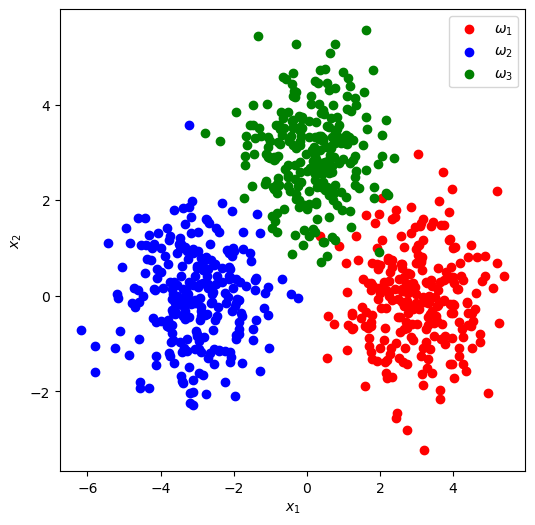

In [7]:
plt.figure(figsize=(6,6))
plt.scatter(data_c1[:,0], data_c1[:,1], color='r',label='$\omega_1$')
plt.scatter(data_c2[:,0], data_c2[:,1], color='b', label='$\omega_2$')
plt.scatter(data_c3[:,0], data_c3[:,1], color='green', label='$\omega_3$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.savefig('3-classes.png')
# plt.show()

In [8]:
paras = est_gaussian_paras(train_data, train_labels)
paras

[(array([ 2.98918767, -0.09976262]),
  array([[0.98186555, 0.01235993],
         [0.01235993, 0.99575887]]),
  0.3333333333333333),
 (array([-3.04735292,  0.02867753]),
  array([[ 1.077493  , -0.02023104],
         [-0.02023104,  0.96391337]]),
  0.3333333333333333),
 (array([0.10019492, 2.92358892]),
  array([[0.84430314, 0.00468203],
         [0.00468203, 0.83151042]]),
  0.3333333333333333)]

In [9]:
# evaluation on test dataset
classes = np.unique(train_labels)
predict = bayes_gaussian_predict(test_data, paras, classes)
print('accuracy on test dataset:', np.count_nonzero(predict == test_labels) / len(test_labels))

accuracy on test dataset: 0.9866666666666667


### Problem 2 (Part IV): Mahalanobis distance (Compare with built-in function of scipy)

In [10]:
d = 10
a = np.random.randn(d)
mu = np.random.randn(d)
cov = np.random.randn(d, d)
cov = cov.T @ cov
print('my function result', mahalanobis_dist(a, mu, cov))
print('built-in fucntion result', distance.mahalanobis(a, mu, np.linalg.inv(cov)))


my function result 4.149416316189283
built-in fucntion result 4.149416316189284


### Problem 2 (Part V): Implement the naïve Bayes classifier from scratch and then compare your results to that of Python’s built-in implementation.

In [11]:
# generate data randomly
np.random.seed(123)
d = 10 # number of features
C = 10 # number of classes, [1, 1, ..., C]

mu_list = [np.random.randn(d) for c in range(C)]
cov_list = [np.diag(np.random.rand(d) * 3) for c in range(C)]

prior_probs = np.random.rand(10)
prior_probs = prior_probs / np.linalg.norm(prior_probs, 1)

In [12]:
# generate labels and dataset randomly
N = 2000
print('prio classes probabilities:\t\t', [round(p,3) for p in prior_probs])

labels = sample(N, prior_probs, sorted=True)
labels = np.array(labels)
counts = Counter(labels)
print('sampling (relative frequencies):\t', (np.array(list(counts.values())) / N).round(3).tolist())

prio classes probabilities:		 [0.083, 0.096, 0.036, 0.064, 0.17, 0.037, 0.084, 0.198, 0.047, 0.184]
sampling (relative frequencies):	 [0.087, 0.092, 0.038, 0.073, 0.167, 0.037, 0.078, 0.193, 0.038, 0.197]


In [13]:
data = []
for nc, mu, cov in zip(counts.values(), mu_list, cov_list):
    data.append(np.random.multivariate_normal(mu, cov, nc))
data = np.vstack(data)

In [14]:
my_clf = NaiveBayesClassifier()
builtin_clf = GaussianNB()

In [15]:
my_clf.fit(data, labels)
builtin_clf.fit(data, labels)
assert np.allclose(builtin_clf.class_prior_, my_clf.probs), "prior classes probabilities are not the same!"

In [16]:
# generate test dataset and predict & evaluate
M = 500
test_labels = sample(N, prior_probs, sorted=True)
test_data = []
for nc, mu, cov in zip(Counter(test_labels).values(), mu_list, cov_list):
    test_data.append(np.random.multivariate_normal(mu, cov, nc))
test_data = np.vstack(test_data)


In [17]:
predict_my = my_clf.predict(test_data)
predict_builtin = builtin_clf.predict(test_data)
print('accuracy of my Bayes Classifier on test dataset: {:.4f}'.format(metrics.accuracy_score(test_labels, predict_builtin)))
print('accuracy of builtin Bayes Classifier on test dataset: {:.4f}'.format(metrics.accuracy_score(test_labels, predict_my)))


accuracy of my Bayes Classifier on test dataset: 0.9370
accuracy of builtin Bayes Classifier on test dataset: 0.9115
